# Time-Series Prediction

## Imports

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)

# Import the plotting library
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

from keras.layers import GRU, Embedding, LSTM

from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
#!pip install yfinance
import yfinance as yf

In [3]:
#!pip install pandas_datareader
from pandas_datareader import data as wb

### Download Stock Market Data using Yahoo Finance

[*********************100%***********************]  1 of 1 completed


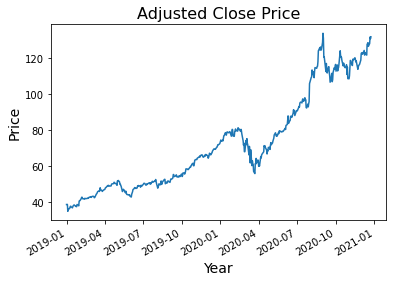

In [4]:
# Get the data of the stock AAPL
aapl = yf.download('AAPL','2019-01-01','2020-12-28')
# Plot the close price of the AAPL
aapl['Adj Close'].plot()
plt.title("Adjusted Close Price", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.show()

In [5]:
aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,39.632500,39.840000,39.119999,39.435001,38.518612,140014000
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.562561,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.721451,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,36.203678,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,36.123104,219111200


In [6]:
aapl.describe()

,Open,High,Low,Close,Adj Close,Volume
count,502.000000,502.000000,502.000000,502.000000,502.000000,5.020000e+02
mean,73.100408,74.039452,72.233466,73.196016,72.663354,1.322561e+08
std,26.920227,27.321302,26.376295,26.856523,27.103660,6.365159e+07
min,35.994999,36.430000,35.500000,35.547501,34.721451,2.420510e+07
25%,50.768749,51.113126,50.352500,50.717500,49.929929,8.936900e+07
50%,66.389999,67.000000,65.716251,66.557503,66.063404,1.155105e+08
75%,90.996876,91.753748,89.570623,91.027496,90.707176,1.554280e+08
max,137.589996,137.979996,131.100006,134.179993,133.948898,4.268848e+08


In [7]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 502 entries, 2018-12-31 to 2020-12-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       502 non-null    float64
 1   High       502 non-null    float64
 2   Low        502 non-null    float64
 3   Close      502 non-null    float64
 4   Adj Close  502 non-null    float64
 5   Volume     502 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.5 KB


In [8]:
#aapl_daily_returns = aapl['Adj Close'].pct_change()
#aapl_monthly_returns = aapl['Adj Close'].resample('M').ffill().pct_change()

A nice tutorial on financial data analysis: https://www.codingfinance.com/post/2018-04-03-calc-returns-py/

### Calculating the daily and monthly returns for individual stock:

Once we downloaded the stock prices from yahoo finance, the next thing to do is to calculate the returns. We will again use pandas package to do the calculations. We have already downloaded the price data for AAPL above, if you haven’t done that then see the above section. We will calculate the monthly and daily price returns.
```python
aapl_daily_returns = aapl['Adj Close'].pct_change()
aapl_monthly_returns = aapl['Adj Close'].resample('M').ffill().pct_change()
```

### Calculating the cumulative returns for individual stock:

Plotting the daily and monthly returns are useful for understanding the daily and monthly volatility of the investment. To calculate the growth of our investment or, in other words, calculating the total returns from our investment, we need to calculate the cumulative returns from that investment. To calculate the cumulative returns we will use the cumprod() function.
```python
aapl_cum_returns = (aapl_daily_returns + 1).cumprod()
```

#### Plot the data:
```python
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(aapl_cum_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("AAPL daily returns data")
plt.show()
```

### Download Several Stocks

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


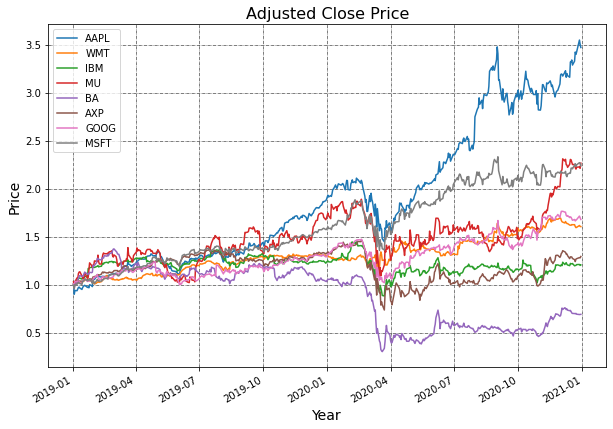

In [10]:
# Define the ticker list
tickers_list = ['AAPL', 'WMT', 'IBM', 'MU', 'BA', 'AXP','GOOG','MSFT']

stock_data = pd.DataFrame(columns=tickers_list)
# Fetch the data

for ticker in tickers_list:
    stock_data[ticker] = yf.download(ticker, '2019-1-1', '2020-12-31')['Adj Close']
# Print first 5 rows of the data
#stock_data.head()


# Plot all the close prices
# the cumulative returns for individual stocks
((stock_data.pct_change()+1).cumprod()).plot(figsize=(10, 7))
# Show the legend
plt.legend()
# Define the label for the title of the figure
plt.title("Adjusted Close Price", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()



In [11]:
stock_data.head()

,AAPL,WMT,IBM,MU,BA,AXP,GOOG,MSFT
Date,,,,,,,,
2018-12-31,38.518612,89.801826,103.062599,31.730000,313.372223,92.294746,1035.609985,99.040863
2019-01-02,38.562561,89.984993,104.458885,32.750000,314.645142,92.643311,1045.849976,98.602066
2019-01-03,34.721451,89.522263,102.373520,31.000000,302.100555,90.834969,1016.059998,94.974693
2019-01-04,36.203678,90.081413,106.371994,32.700001,317.822601,94.928040,1070.709961,99.391899
2019-01-07,36.123104,91.141884,107.124527,34.000000,318.823395,95.443306,1068.390015,99.518669


### Download Stock Market Data using Pandas DataReader

In [12]:
#import datetime as dt

start = '2019-6-20'
end = '2019-7-20'

tickers = ['CSCO','AXP','HD','PG']

thelen = len(tickers)

price_data = []
for ticker in tickers:
    prices = wb.DataReader(ticker, start = start, end = end, data_source='yahoo')[['Adj Close']]
    price_data.append(prices.assign(ticker=ticker)[['ticker', 'Adj Close']])

stock_df = pd.concat(price_data)
#stock_df.dtypes
#stock_df.head()
#stock_df.shape


In [13]:
stock_df

,ticker,Adj Close
Date,,
2019-06-20,CSCO,54.739899
2019-06-21,CSCO,54.377571
2019-06-24,CSCO,54.520596
2019-06-25,CSCO,53.471756
2019-06-26,CSCO,53.967571
...,...,...
2019-07-15,PG,111.260757
2019-07-16,PG,111.655769
2019-07-17,PG,111.703934


In [14]:
# Create a pivot table to summarise data
stock_df = stock_df.reset_index()
stock_df = stock_df.set_index('Date')
table = stock_df.pivot(columns='ticker')
# By specifying col[1] in below list comprehension
# You can select the stock names under multi-level column
table.columns = [col[1] for col in table.columns]
table.head()

,AXP,CSCO,HD,PG
Date,,,,
2019-06-20,121.880264,54.739899,203.824600,107.657394
2019-06-21,121.694901,54.377571,202.030014,107.137115
2019-06-24,121.119255,54.520596,198.276718,108.225838
2019-06-25,120.163094,53.471756,197.543427,107.638123
2019-06-26,120.582642,53.967571,199.164383,105.720833


In [15]:
table.shape

(21, 4)

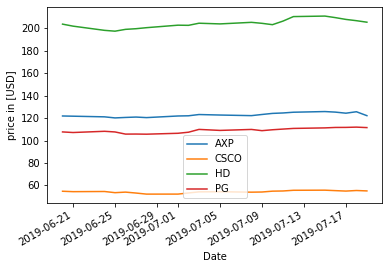

In [16]:
for column in table.columns:
    f = table[column] 
    #f = ((f.pct_change()+1).cumprod())
    f.plot(label=column);
    plt.legend()
    plt.ylabel('price in [USD]')

plt.show()

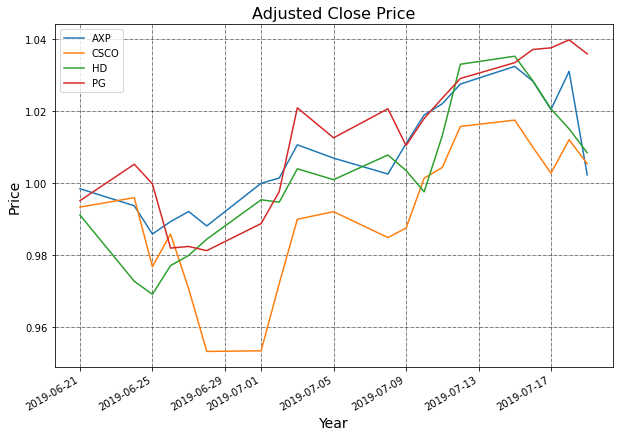

In [17]:
# Plot all the close prices
# the cumulative returns for individual stocks
((table.pct_change()+1).cumprod()).plot(figsize=(10, 7))
# Show the legend
plt.legend()
# Define the label for the title of the figure
plt.title("Adjusted Close Price", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

### Load Data from a Table (csv)

In [18]:
water_data = pd.read_csv('WaterLevel-Dataset.csv')

Reverse data as it is ordered backwards

In [19]:
water_data = water_data.iloc[::-1]
water_data.reset_index(inplace=True, drop=True)
water_data.head()

,Date,Capacity (%),Water Level (m)
0,17-Apr-17,78.4,26.0
1,24-Apr-17,70.3,23.3
2,01-May-17,58.6,19.5
3,08-May-17,53.4,17.7
4,15-May-17,47.9,15.9


### Check if there any Missing Data

In [20]:
water_data.isnull().sum()

Date               0
Capacity (%)       0
Water Level (m)    0
dtype: int64

### Set the Date column as index

In [21]:
# convert to datetime
water_data['Date'] = pd.to_datetime(water_data['Date'])

# set the index
water_data.set_index('Date', inplace=True)
water_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 125 entries, 2017-04-17 to 2019-09-09
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Capacity (%)     125 non-null    float64
 1   Water Level (m)  125 non-null    float64
dtypes: float64(2)
memory usage: 2.9 KB


In [22]:
water_data.head()

,Capacity (%),Water Level (m)
Date,,
2017-04-17,78.4,26.0
2017-04-24,70.3,23.3
2017-05-01,58.6,19.5
2017-05-08,53.4,17.7
2017-05-15,47.9,15.9


### Visualise Data

<AxesSubplot:xlabel='Date'>

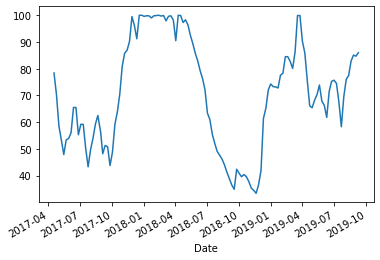

In [23]:
water_data['Capacity (%)'].plot()

<AxesSubplot:xlabel='Date'>

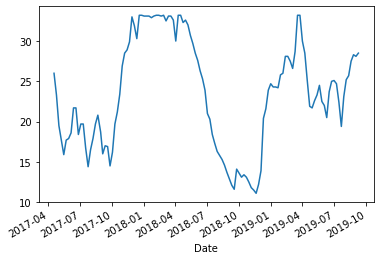

In [24]:
water_data['Water Level (m)'].plot()

In [25]:
water_data.values.shape

(125, 2)

### Split the Data into Train/test subsets .. ONLY use IBM

In [26]:
stock_data.shape

(505, 8)

<AxesSubplot:xlabel='Date'>

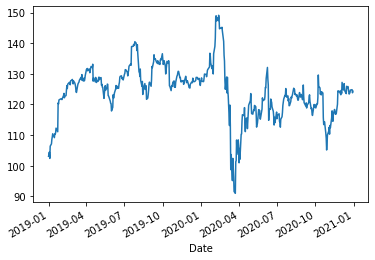

In [27]:
data = stock_data['IBM']
data.plot()

In [28]:
train_df = data[:380]#aapl['Adj Close'][:250]#df['Water Level (m)'][0:100]
print('train shape:', train_df.shape)
test_df = data[380:]#aapl['Adj Close'][250:]#df['Water Level (m)'][100:]
print('test shape: ',test_df.shape)

print("Min x:", np.min(train_df))
print("Max x:", np.max(train_df))

train shape: (380,)
test shape:  (125,)
Min x: 90.98784637451172
Max x: 149.11178588867188


### Normalise the Data into values between 0 and 1

In [29]:
## After this step train and test will become numpy matrices instead of pandas dataframes
## NOTICE: we use the model that is fitted to the train data to scale the test data .. 
## very important to do it this way!

x_scaler = MinMaxScaler()
train = x_scaler.fit_transform(train_df.values.reshape(-1, 1))
test = x_scaler.transform(test_df.values.reshape(-1, 1))

In [30]:
# make sure values are between 0-1
print("Min x:", np.min(train))
print("Max x:", np.max(train))

Min x: 0.0
Max x: 0.9999999999999998


### To Split Data into Sequences


In [31]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

#### Create sequences for training data

In [32]:
seq = [1,2,3,4,5,6,7,8,9,10]
steps = 3
split_sequence(seq,steps)

(array([[1, 2, 3],
        [2, 3, 4],
        [3, 4, 5],
        [4, 5, 6],
        [5, 6, 7],
        [6, 7, 8],
        [7, 8, 9]]),
 array([ 4,  5,  6,  7,  8,  9, 10]))

In [33]:
# define input sequence
train #train['Capacity (%)'].values
# choose a number of time steps
n_steps = 5
# split into samples
X_train, y_train = split_sequence(train, n_steps)

In [34]:
X_train

array([[[0.20774147],
        [0.23176404],
        [0.19588613],
        [0.26467834],
        [0.27762538]],

       [[0.23176404],
        [0.19588613],
        [0.26467834],
        [0.27762538],
        [0.30383199]],

       [[0.19588613],
        [0.26467834],
        [0.27762538],
        [0.30383199],
        [0.31724737]],

       ...,

       [[0.43345622],
        [0.38340491],
        [0.42709506],
        [0.39629446],
        [0.43914756]],

       [[0.38340491],
        [0.42709506],
        [0.39629446],
        [0.43914756],
        [0.45622183]],

       [[0.42709506],
        [0.39629446],
        [0.43914756],
        [0.45622183],
        [0.41889271]]])

#### Create sequences for test data

In [35]:
# define test sequence
#test_raw_seq = test #test['Capacity (%)'].values
# choose a number of time steps .. same as training!
#n_steps = 5
# split into samples
X_test, y_test = split_sequence(test, n_steps)
#X_test.shape

#### Data Shape suitable for feeding into TF/Keras

In [36]:
print(X_train.shape)
print(X_test.shape)

(375, 5, 1)
(120, 5, 1)


## Model Building and Fitting (RNN, LSTM and GRU)

In [37]:
n_features = 1

# define model
model = Sequential()

# Single layer GRU
#model.add(GRU(32 , input_shape=(n_steps, n_features) ))

# Stacked GRU
#model.add(GRU(8 , input_shape=(n_steps, n_features) , return_sequences=True))
#model.add(GRU(16, return_sequences=True))
#model.add(GRU(32))

# Stacked LSTM
model.add(LSTM(8, activation='relu', input_shape=(n_steps, n_features), return_sequences=True))
model.add(LSTM(16, activation='relu', return_sequences=True))
model.add(LSTM(32, activation='relu'))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1, callbacks=[es, mc])

# fit model
#model.fit(X_train, y_train, epochs=50, verbose=1, callbacks=[es, mc])

Epoch 1/100
10/10 [==============================] - 7s 124ms/step - loss: 0.4014 - val_loss: 0.1635

Epoch 00001: val_loss improved from inf to 0.16353, saving model to best_model.h5
Epoch 2/100
10/10 [==============================] - 0s 12ms/step - loss: 0.3705 - val_loss: 0.1311

Epoch 00002: val_loss improved from 0.16353 to 0.13109, saving model to best_model.h5
Epoch 3/100
10/10 [==============================] - 0s 14ms/step - loss: 0.3137 - val_loss: 0.0929

Epoch 00003: val_loss improved from 0.13109 to 0.09288, saving model to best_model.h5
Epoch 4/100
10/10 [==============================] - 0s 14ms/step - loss: 0.2388 - val_loss: 0.0503

Epoch 00004: val_loss improved from 0.09288 to 0.05034, saving model to best_model.h5
Epoch 5/100
10/10 [==============================] - 0s 11ms/step - loss: 0.1410 - val_loss: 0.0175

Epoch 00005: val_loss improved from 0.05034 to 0.01753, saving model to best_model.h5
Epoch 6/100
10/10 [==============================] - 0s 13ms/step - 

10/10 [==============================] - 0s 24ms/step - loss: 0.0051 - val_loss: 0.0084

Epoch 00051: val_loss did not improve from 0.00832
Epoch 52/100
10/10 [==============================] - 0s 24ms/step - loss: 0.0038 - val_loss: 0.0082

Epoch 00052: val_loss improved from 0.00832 to 0.00823, saving model to best_model.h5
Epoch 53/100
10/10 [==============================] - 0s 28ms/step - loss: 0.0043 - val_loss: 0.0084

Epoch 00053: val_loss did not improve from 0.00823
Epoch 54/100
10/10 [==============================] - 0s 30ms/step - loss: 0.0046 - val_loss: 0.0083

Epoch 00054: val_loss did not improve from 0.00823
Epoch 55/100
10/10 [==============================] - 0s 34ms/step - loss: 0.0039 - val_loss: 0.0085

Epoch 00055: val_loss did not improve from 0.00823
Epoch 56/100
10/10 [==============================] - 0s 38ms/step - loss: 0.0052 - val_loss: 0.0085

Epoch 00056: val_loss did not improve from 0.00823
Epoch 57/100
10/10 [==============================] - 0s 23m

In [38]:
history.history

{'loss': [0.4059586226940155,
  0.35748937726020813,
  0.29812273383140564,
  0.22241124510765076,
  0.12836329638957977,
  0.04027293249964714,
  0.015050012618303299,
  0.013337040320038795,
  0.012173833325505257,
  0.011068890802562237,
  0.011103644035756588,
  0.010692371986806393,
  0.010367597453296185,
  0.010000783018767834,
  0.00972900353372097,
  0.009247400797903538,
  0.008819013833999634,
  0.00834993552416563,
  0.007832162082195282,
  0.007324523292481899,
  0.006953457836061716,
  0.0064265052787959576,
  0.006009960081428289,
  0.005714794155210257,
  0.005718959029763937,
  0.005269961431622505,
  0.005206461530178785,
  0.005079442635178566,
  0.005056147463619709,
  0.0049977595917880535,
  0.004943965468555689,
  0.004888779018074274,
  0.004889256786555052,
  0.004845744930207729,
  0.005009487271308899,
  0.005367580335587263,
  0.004831903148442507,
  0.004722891841083765,
  0.0046923523768782616,
  0.0046791802160441875,
  0.004844117444008589,
  0.005029007

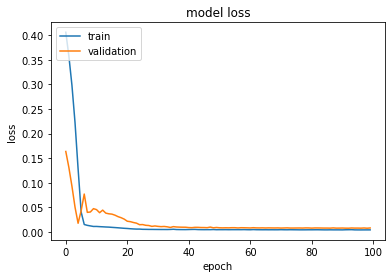

In [39]:
## visualise performance (training loss vs validation loss)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Model Building and Fitting CNN

In [40]:
n_features = 1
# define model
model = Sequential()
#model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X_train, y_train, epochs=20, verbose=1)


Epoch 1/20
12/12 [==============================] - 1s 2ms/step - loss: 0.3101
Epoch 2/20
12/12 [==============================] - 0s 1ms/step - loss: 0.0652
Epoch 3/20
12/12 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 4/20
12/12 [==============================] - 0s 2ms/step - loss: 0.0071
Epoch 5/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 6/20
12/12 [==============================] - 0s 2ms/step - loss: 0.0052
Epoch 7/20
12/12 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 8/20
12/12 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 9/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 10/20
12/12 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 11/20
12/12 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 12/20
12/12 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 13/20
12/12 [==============================

### Load the saved model

In [41]:
from keras.models import load_model

# load the saved model
model = load_model('best_model.h5')

#### Compute RMSE for Evaluation

In [42]:
def rmse(y_true, y_pred):
        return np.sqrt(np.mean(np.square(y_pred - y_true))) 

In [43]:
preds = []
# demonstrate predictions
for i in range(X_test.shape[0]):
    x_input = X_test[i]
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    preds.append(yhat[0])
    #print(yhat[0], y_test[i])

In [45]:
preds

[array([0.41388285], dtype=float32),
 array([0.3999477], dtype=float32),
 array([0.40256932], dtype=float32),
 array([0.40982255], dtype=float32),
 array([0.43744808], dtype=float32),
 array([0.45956993], dtype=float32),
 array([0.48651966], dtype=float32),
 array([0.51222384], dtype=float32),
 array([0.5282671], dtype=float32),
 array([0.54289293], dtype=float32),
 array([0.5515855], dtype=float32),
 array([0.55633193], dtype=float32),
 array([0.5500941], dtype=float32),
 array([0.53622746], dtype=float32),
 array([0.52582437], dtype=float32),
 array([0.51577437], dtype=float32),
 array([0.5064329], dtype=float32),
 array([0.5014646], dtype=float32),
 array([0.50157505], dtype=float32),
 array([0.51430774], dtype=float32),
 array([0.5277814], dtype=float32),
 array([0.5370892], dtype=float32),
 array([0.54627585], dtype=float32),
 array([0.55950814], dtype=float32),
 array([0.570373], dtype=float32),
 array([0.57083535], dtype=float32),
 array([0.5625356], dtype=float32),
 array([0.55

### After getting the predictions we need to transform the predicted and actual Y values into their original range
### Remember we applied scaling previously

In [46]:
# The output of the model is between 0 and 1.
# Do an inverse map to get it back to the scale
# of the original data-set.
preds   = x_scaler.inverse_transform(np.array(preds))
# we also rescale the y_test values into their original range (inverse scaling)
actuals = x_scaler.inverse_transform(y_test)

In [47]:
rmse(actuals, preds)

3.172560745121698

#### Plot True vs Predicted

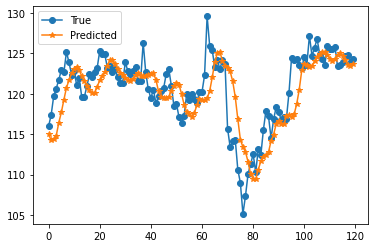

In [48]:
# multiple line plot
plt.plot(actuals, marker='o', label='True')
plt.plot(preds, marker='*', label='Predicted')

plt.legend()

# WELL DONE!